<h1 style="font-size:3rem;color:orange;">Final Exam</h1>

# Problem 1

#### (50 points) This problems will examine logistic regression for the Bank Marketing dataset in the file bank_data.csv Download bank_data.csv. Descriptions of the features are available here Links to an external site.. The variable of interest is the y feature, a binary outcome that indicates if a customer has made a deposit. The original dataset has been edited so that there are an equal number of positive and negative outcomes. All string-valued features are categorical and all number-valued features are numerical. Although the dataset description says that the duration feature might not be appropriate for true predictions, you will use it as a feature for this problem. Split your dataset into a training set with 80% of observations and a validation set with 20% of observations.

#### (a)  Learn a logistic regression model using the full set of variables. From your full set of variables, select the most relevant features and create a logistic regression model using the reduced set of features. Plot an ROC curve and report the AUC for the full and reduced model on both the training and validation sets (4 curves in all). Comment on the degree of overfitting that you observe. Compare the performance of the full and reduced model on the validation set.

Test Size =  0.25 

age Score: 0.00369
balance Score: 0.00001
day Score: 0.01941
duration Score: 0.00524
campaign Score: 0.09792
pdays Score: 0.00044
previous Score: 0.00094
job_admin. Score: 0.32333
job_blue-collar Score: 0.45214
job_entrepreneur Score: 0.04691
job_housemaid Score: 0.21215
job_management Score: 0.17409
job_retired Score: 0.34934
job_self-employed Score: 0.32405
job_services Score: 0.25598
job_student Score: 0.32842
job_technician Score: 0.13272
job_unemployed Score: 0.31690
job_unknown Score: 0.18440
marital_divorced Score: 0.01421
marital_married Score: 0.19633
marital_single Score: 0.07692
education_primary Score: 0.11032
education_secondary Score: 0.11860
education_tertiary Score: 0.08969
education_unknown Score: 0.14823
default_no Score: 0.47581
default_yes Score: 0.18836
housing_no Score: 0.00505
housing_yes Score: 0.29251
loan_no Score: 0.22895
loan_yes Score: 0.51640
contact_cellular Score: 0.41105
contact_telephone Score: 0.26217
contact_unknown Score: 0.96068

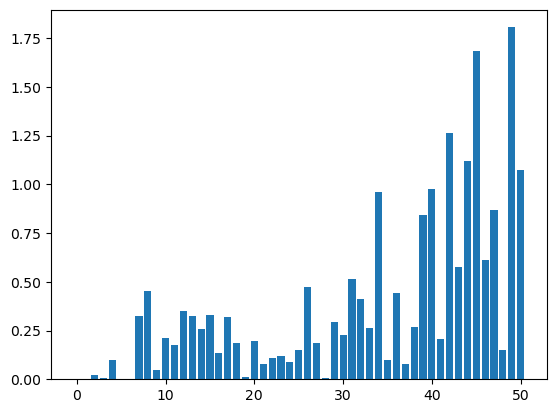

In [1]:
#%% Step 1 - Load Data
import pandas as pd
file_path = 'C:/Users/danma/Downloads/bank_data.csv'
df = pd.read_table(file_path, sep=",")

del file_path
#create x and y columns
x = df.drop(['y'],axis=1)
y = df['y']

#create categorical columns for x
x = pd.get_dummies(x)

#convert y into binary 1 or 0
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
y = enc.fit_transform(y.to_frame())
y = pd.DataFrame(y, columns = ["y"])
df = pd.concat([x, y], axis=1)
#turns y into a 1-d array instead of a dataframe column for logistic regression
y = y.to_numpy()
y = y.ravel()
del enc

#splits into training and test data
from sklearn.model_selection import train_test_split as TTS
TS = 0.25 #for tuning
print("Test Size = ", TS, "\n")
train, test = TTS(df, test_size=0.25)
x_train = train.loc[:, df.columns != 'y']
y_train = train['y']
x_test = test.loc[:, df.columns != 'y']
y_test = test['y']

#fit model
from sklearn.linear_model import LogisticRegression

completemodel = LogisticRegression(max_iter=5000).fit(x,y)

from matplotlib import pyplot

# Get Importance
importance = completemodel.coef_[0]

colnames = list(x_train.columns)
# summarize feature importance
for i,v in enumerate(importance):
	print(colnames[i],'Score: %.5f' % (abs((v))))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], abs(importance))
pyplot.show()
del importance, i, v, colnames

<font color = blue><b>features identified as non-valuable, having coefficient less than 0.05, are age, balance, day, duration, pdays, and previous.</font></b>

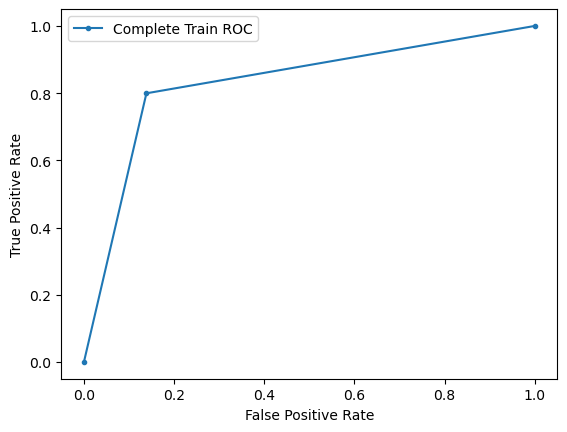

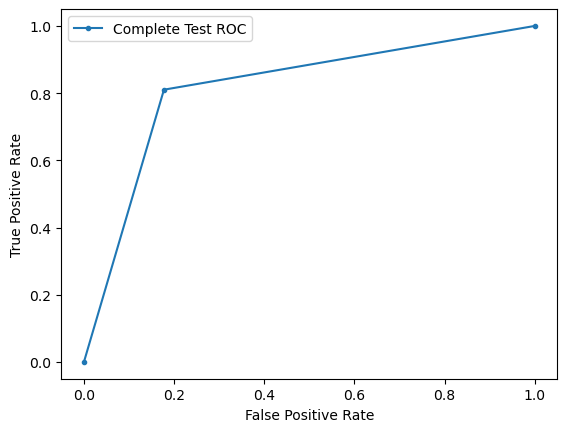

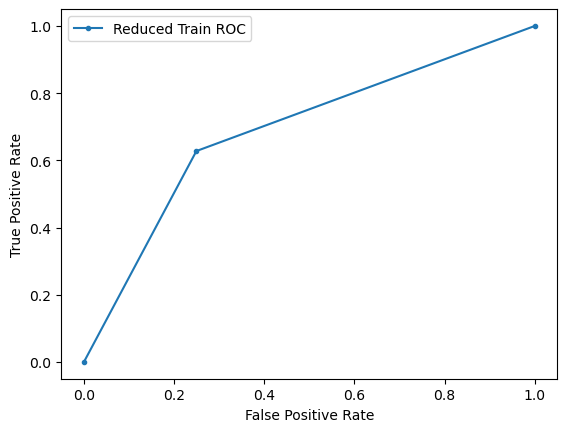

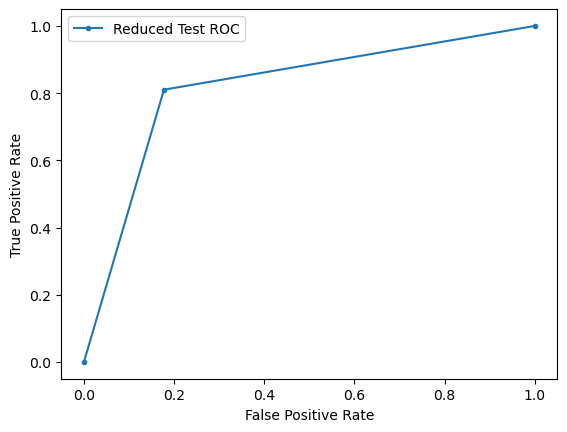



AUC Score Results:

╒═════╤══════════════════╤═════════════════╤═════════════════╤════════════════╕
│     │   Complete Train │   Complete Test │   Reduced Train │   Reduced Test │
╞═════╪══════════════════╪═════════════════╪═════════════════╪════════════════╡
│ AUC │          0.83047 │          0.8164 │        0.689117 │       0.652372 │
╘═════╧══════════════════╧═════════════════╧═════════════════╧════════════════╛


In [2]:
#%% Fitting Reduced Model
red_train = train.drop(['age','balance','day','duration','pdays','previous'],axis=1)
red_test =  test.drop(['age','balance','day','duration','pdays','previous'],axis=1)

red_x_train = red_train.loc[:, red_train.columns != 'y']
red_x_test = red_test.loc[:, red_test.columns != 'y']

reducedmodel = LogisticRegression(max_iter=5000).fit(red_x_train,y_train)
completemodel = LogisticRegression(max_iter=5000).fit(x_train,y_train)

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

#Complete Model Training
comp_train_pred = completemodel.predict(x_train)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_train.astype('int32'), comp_train_pred)
pyplot.plot(fpr, tpr, marker='.', label='Complete Train ROC')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

#to create summary table at the end
from tabulate import tabulate

data = {'Complete Train': [roc_auc_score(y_train.astype('int32'), comp_train_pred)]}
table = pd.DataFrame(data)

#Complete Model Testing
comp_test_pred = completemodel.predict(x_test)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test.astype('int32'), comp_test_pred)
pyplot.plot(fpr, tpr, marker='.', label='Complete Test ROC')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

data = {'Complete Test': [roc_auc_score(y_test.astype('int32'), comp_test_pred)]}
table['Complete Test'] = pd.DataFrame(data)

#Reduced Model Training
red_train_pred = reducedmodel.predict(red_x_train)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_train.astype('int32'), red_train_pred)
pyplot.plot(fpr, tpr, marker='.', label='Reduced Train ROC')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

data = {'Reduced Train': [roc_auc_score(y_train.astype('int32'), red_train_pred)]}
table['Reduced Train'] = pd.DataFrame(data)

#Reduced Model Testing
red_test_pred = reducedmodel.predict(red_x_test)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test.astype('int32'), comp_test_pred)
pyplot.plot(fpr, tpr, marker='.', label='Reduced Test ROC')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

data = {'Reduced Test': [roc_auc_score(y_test.astype('int32'), red_test_pred)]}
table['Reduced Test'] = pd.DataFrame(data)

print("\n\nAUC Score Results:\n")

print(tabulate(table, headers='keys',tablefmt='fancy_grid',showindex=["AUC"]))

del comp_test_pred, comp_train_pred, fpr, red_test_pred, red_train_pred, thresholds, tpr, data, table, red_test, red_train, red_x_train, red_x_test, completemodel, reducedmodel

<font color = blue><b>Both models appear to have similar degrees of fitting, where the gaps between the AUC's are .02-.03. This gap is found between the validation/test and training AUC's from their ROC curve. Having said that, neither model shows a degree of overfitting due to having a small gap between AUC's. We can see that the complete model has a far better AUC being nearly 0.2 higher, therefore we would continue with the complete model.</font></b>

#### (b)  Learn a LASSO logistic regression model (the R command model.matrix() might be useful for formatting your dataframe to use with glmnet, see the ridge and lasso regression  Download ridge and lasso regressionfile Download file). Tune the value of λ using 10-fold cross-validation. Visualize the cross-validation error across different values of lambda, and report the value of λ that minimizes cross-validation error. Report the features that your LASSO model selects at the optimal value of λ, and compare these features to the features you selected in part a). Make an ROC curve and calculate the AUC for the training and validation data for your LASSO model.

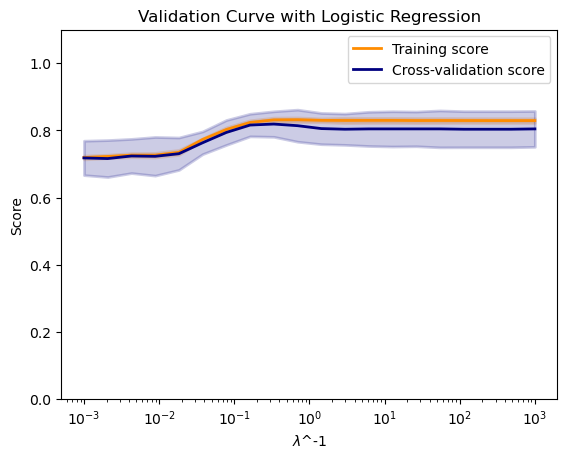

LASSO optimal λ =  [0.33598183]
age Score: 0.00171
balance Score: 0.00000
day Score: 0.01003
duration Score: 0.00494
campaign Score: 0.11577
pdays Score: 0.00020
previous Score: 0.00000
job_admin. Score: 0.02135
job_blue-collar Score: 0.41735
job_entrepreneur Score: 0.00000
job_housemaid Score: 0.00000
job_management Score: 0.07824
job_retired Score: 0.13935
job_self-employed Score: 0.00000
job_services Score: 0.00000
job_student Score: 0.00000
job_technician Score: 0.04549
job_unemployed Score: 0.00000
job_unknown Score: 0.00000
marital_divorced Score: 0.00000
marital_married Score: 0.15577
marital_single Score: 0.00000
education_primary Score: 0.00000
education_secondary Score: 0.03263
education_tertiary Score: 0.15105
education_unknown Score: 0.00000
default_no Score: 0.25933
default_yes Score: 0.00000
housing_no Score: 0.00000
housing_yes Score: 0.28937
loan_no Score: 0.00000
loan_yes Score: 0.57919
contact_cellular Score: 0.00000
contact_telephone Score: 0.00000
contact_unknown Sc

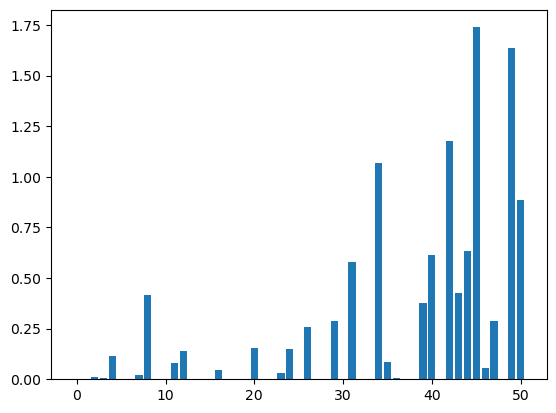

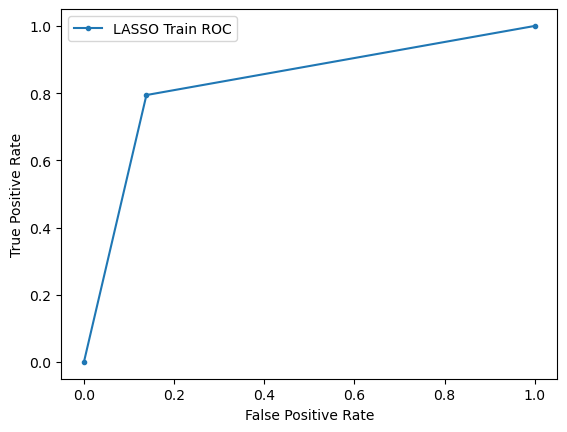

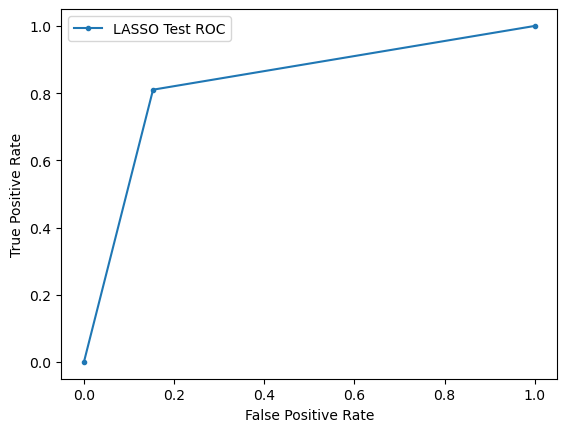



AUC Score Results:

╒═════╤═══════════════╤══════════════╕
│     │   LASSO Train │   LASSO Test │
╞═════╪═══════════════╪══════════════╡
│ AUC │      0.827866 │     0.828497 │
╘═════╧═══════════════╧══════════════╛


In [3]:
    #%% Create LASSO Model
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import validation_curve
import numpy as np
list_alphas = np.logspace(-3,3,20)

train_scores, valid_scores = validation_curve(
    LogisticRegression(penalty='l1', max_iter=5000,solver='liblinear',), x, y, param_name="C", param_range=list_alphas,
    cv=10,
    n_jobs=-1)
lasso = LogisticRegressionCV(penalty='l1', cv=10, n_jobs=-1, max_iter=5000,solver='liblinear', Cs=list_alphas).fit(x,y)
from matplotlib import pyplot as plt
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(valid_scores, axis=1)
test_scores_std = np.std(valid_scores, axis=1)

plt.title("Validation Curve with Logistic Regression")
plt.xlabel(r"$\lambda$^-1")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(
    list_alphas, train_scores_mean, label="Training score", color="darkorange", lw=lw
)
plt.fill_between(
    list_alphas,
    train_scores_mean - train_scores_std,
    train_scores_mean + train_scores_std,
    alpha=0.2,
    color="darkorange",
    lw=lw,
)
plt.semilogx(
    list_alphas, test_scores_mean, label="Cross-validation score", color="navy", lw=lw
)
plt.fill_between(
    list_alphas,
    test_scores_mean - test_scores_std,
    test_scores_mean + test_scores_std,
    alpha=0.2,
    color="navy",
    lw=lw,
)
plt.legend(loc="best")
plt.show()

print("LASSO optimal λ = ",lasso.C_)

from matplotlib import pyplot

# Get Importance
importance = lasso.coef_[0]

colnames = list(x_train.columns)
# summarize feature importance
for i,v in enumerate(importance):
	print(colnames[i],'Score: %.5f' % (abs((v))))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], abs(importance))
pyplot.show()
del importance, i, v, colnames

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

#Complete Model Training
comp_train_pred = lasso.predict(x_train)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_train.astype('int32'), comp_train_pred)
pyplot.plot(fpr, tpr, marker='.', label='LASSO Train ROC')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

#to create summary table at the end
from tabulate import tabulate

data = {'LASSO Train': [roc_auc_score(y_train.astype('int32'), comp_train_pred)]}
table = pd.DataFrame(data)

#Complete Model Testing
comp_test_pred = lasso.predict(x_test)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test.astype('int32'), comp_test_pred)
pyplot.plot(fpr, tpr, marker='.', label='LASSO Test ROC')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

data = {'LASSO Test': [roc_auc_score(y_test.astype('int32'), comp_test_pred)]}
table['LASSO Test'] = pd.DataFrame(data)

print("\n\nAUC Score Results:\n")

print(tabulate(table, headers='keys',tablefmt='fancy_grid',showindex=["AUC"]))

<font color=blue><b>We can see that LASSO's feature importance graph has signficantly less important features, where (a) had 45 important features and LASSO would have 22 in comparison, when omitting coefficients smaller than 0.05. LASSO has 23 less important features than Logistic Regression.</font></b>